In [2]:
import pickle
import re
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from utils_martina.my_utils import *

In [3]:
logs_path = "..\\..\\explainability\GRETEL-repo\\output\\logs\\"
eval_manager_path = "..\\..\\explainability\GRETEL-repo\\output\\eval_manager\\"

In [4]:
# patient_id = "chb01"
# record_id = "26"    # altri possibili valori: "03", "04", "15", "16", "18", "21", "26"

# index_evaluator = 1
# file_name = '8532-Martina.pkl'

In [5]:
patient_id = "chb04"
record_id = "28"    # altri possibili valori: "03", "04", "15", "16", "18", "21", "26"

index_evaluator = 1
file_name = '12748-Martina.pkl'

### Load data

In [7]:
# Load eval_manager from file (qui dentro ho tutte le info di oracolo e explainer)
with open(eval_manager_path + file_name, 'rb') as f:
    eval_manager = pickle.load(f)

In [118]:
# Decidi se vuoi filtrare su un singolo record o no (se togli 'and pair[0].record_id == record_id' hai 548 coppie di grafi e controfattuali)
filtered_pairs = [
    pair for pair in eval_manager._evaluators[index_evaluator].get_instance_explanation_pairs()
    if (pair[0].patient_id == patient_id and pair[0].record_id == record_id)
]

In [119]:
# In filtered_pairs ci sono coppie di grafi, che in Gretel sono salvati come GraphInstance.
# Forse ti può interessare la label associata ai grafi, che è salvata nel campo label
# Per passare a grafi di networkx basta usare .get_nx().
g1, g2 = filtered_pairs[0]

G_orig = g1.get_nx()
G_expl = g2.get_nx()

In [120]:
import pickle

g_orig_list = []
g_expl_list = []

orig_labels = []
expl_labels = []

for g1, g2 in filtered_pairs:
    G_orig = g1.get_nx()
    G_expl = g2.get_nx()

    g_orig_list.append(G_orig)
    g_expl_list.append(G_expl)

    orig_labels.append(g1.label)
    expl_labels.append(g2.label)

with open("grafi_orig.pkl", "wb") as f:
    pickle.dump(g_orig_list, f)

with open("grafi_expl.pkl", "wb") as f:
    pickle.dump(g_expl_list, f)

with open("orig_labels.pkl", "wb") as f:
    pickle.dump(orig_labels, f)

with open("expl_labels.pkl", "wb") as f:
    pickle.dump(expl_labels, f)


### Esempio per grafico

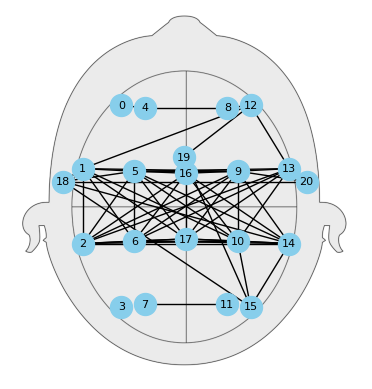

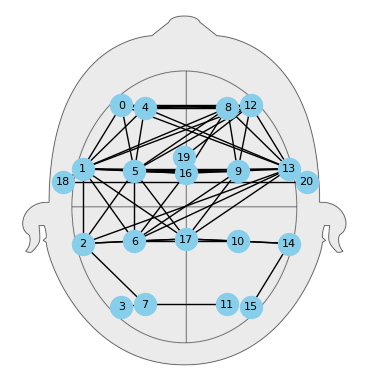

In [123]:
# Load coordinates for plot
with open(f"EEG_data\mid_points_{patient_id}_{record_id}.pkl", 'rb') as f:
    fixed_positions = pickle.load(f)

img_path = "EEG_utils\\nodi-vuoto.png"

def plot_graph(G,img_path):
    img = mpimg.imread(img_path)

    fig, ax = plt.subplots()
    ax.imshow(img)
    nx.draw(G, pos=fixed_positions, ax=ax, with_labels=True, node_color='skyblue', node_size=250, font_size=8, edge_color='black')

    plt.show()

g1, g2 = filtered_pairs[0]

G_orig = g1.get_nx()
G_expl = g2.get_nx()

plot_graph(G_orig,img_path)
plot_graph(G_expl,img_path)
